# 6. Monthly champagne sales millions (1.5 điểm)

Cho dữ liệu champagne_new.xlsx là dữ liệu bán champagne theo thời gian từ tháng 01-1964 đến tháng 09-1972

Yêu cầu: Đọc dữ liệu, chuẩn hóa dữ liệu (nếu cần) và chọn một thuật toán Time Series thích hợp để thực hiện việc dự đoán số tiền champagne bán được của 9 tháng tiếp theo từ tháng 10-1972 đến tháng 06-1973 giá trị dựa trên các thông tin được cung cấp

### Tiền xử lý dữ liệu

In [1]:
# thư viện
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from datetime import timedelta
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
pd.plotting.register_matplotlib_converters()

In [2]:
df = pd.read_excel('champagne_new.xlsx',index_col=0)
if df.isna().any().any(): # Kiểm tra dữ liệu Null
    print('Có dữ liệu Null.')
else:
    print('Không có dữ liệu Null.')

Không có dữ liệu Null.


In [3]:
print('Dữ liệu có {} dòng, {} cột.'.format(df.shape[0],df.shape[1]))

Dữ liệu có 105 dòng, 1 cột.


In [4]:
df.index = pd.to_datetime(df.index)
df.head()

,monthly_champange
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [5]:
df.tail()

,monthly_champange
Month,
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298
1972-08-01,1413
1972-09-01,5877


In [6]:
print('Thông tin dữ liệu.')
df.info()

Thông tin dữ liệu.
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Data columns (total 1 columns):
monthly_champange    105 non-null int64
dtypes: int64(1)
memory usage: 1.6 KB


### 1. Thực hiện Decomposition, trực quan hóa, nhận xét.

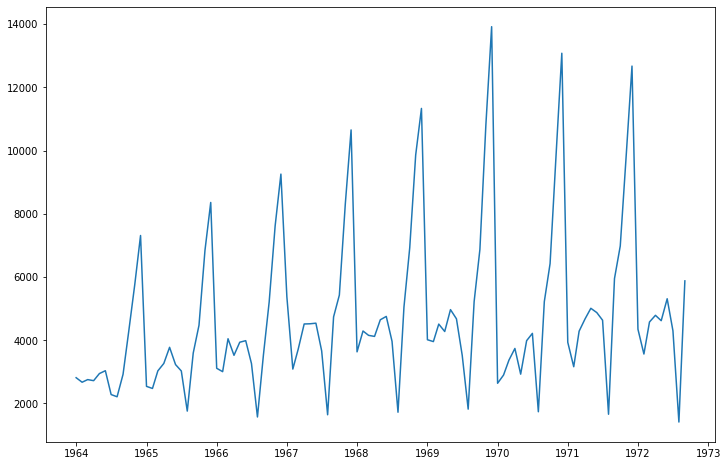

In [7]:
df.index = pd.to_datetime(df.index)
plt.figure(figsize=(12,8))
plt.plot(df)
plt.show()

Biểu đồ thể hiện sự gia tăng phi tuyến tính.

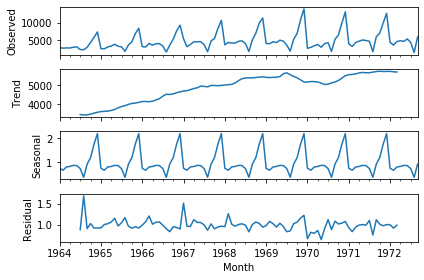

In [8]:
seasons = seasonal_decompose(df,model='multiplicative')
seasons.plot()
plt.show()

Trend thể hiện xu hướng tăng nhưng có sự giảm bất thường từ năm 1970-1971, sau đó tiếp tục tăng. Season thể hiện mùa (hay chu kỳ) cố định qua từng năm. Residual thể hiện có sự sai lệch nhất định giữa giá trị thực và giá trị dự đoán.

### 2. Tạo dữ liệu train/test với train chiếm 75% dữ liệu, test chiếm 25% dữ liệu.

In [9]:
train = df[:int(df.size*0.75)]
test = df[int(df.size*0.75):]

### 3. Áp dụng thuật toán phù hợp.

In [10]:
model = auto_arima(df,m=4,suppress_warnings=True)
model.fit(train)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(0, 1, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(2, 0, 2, 4), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend=None,
      with_intercept=True)

### 4. Tìm kết quả.

In [11]:
result = model.predict(n_periods=(int(test.size)+9))
month = test.index[-1]
forecast = test
for i in range(9):
    month += timedelta(days=32)
    month = month.replace(day=1)
    forecast = forecast.append(pd.DataFrame(index=[month]))
for i in range(int(forecast.size)):
    forecast.monthly_champange[i] = result[i]
forecast

,monthly_champange
1970-07-01,3915.875584
1970-08-01,2179.741607
1970-09-01,8211.125401
1970-10-01,9102.829784
1970-11-01,11587.003700
1970-12-01,13756.551527
1971-01-01,7825.937442
1971-02-01,7189.272587
1971-03-01,6289.984135
1971-04-01,6160.413368


### 5. Trực quan hóa kết quả (trong biểu đồ có cả train, test, predict và next_9_months)

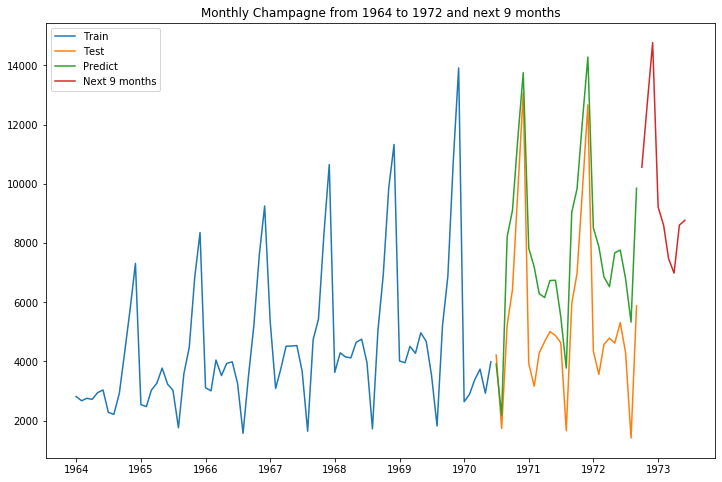

In [12]:
plt.figure(figsize=(12,8))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(forecast.iloc[:int(test.size)],label='Predict')
plt.plot(forecast.iloc[int(test.size):],label='Next 9 months')
plt.legend()
plt.title('Monthly Champagne from 1964 to 1972 and next 9 months')
plt.show()